# Text Classification Assessment

This assessment is a text classification project where the goal is to classify the genre of a movie based on its characteristics, primarily the text of the plot summarization. You have a training set of data that you will use to identify and create your best predicting model. Then you will use that model to predict the classes of the test set of data. We will compare the performance of your predictions to your classmates using the F1 Score. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

The **movie_train.csv** dataset contains information (`Release Year`, `Title`, `Plot`, `Director`, `Cast`) about 10,682 movies and the label of `Genre`. There are 9 different genres in this data set, so this is a multiclass problem. You are expected to primarily use the plot column, but can use the additional columns as you see fit.

After you have identified yoru best performing model, you will create predictions for the test set of data. The test set of data, contains 3,561 movies with all of their information except the `Genre`. 

Below is a list of tasks that you will definitely want to complete for this challenge, but this list is not exhaustive. It does not include any tasds around handling class imbalance or about how to test multiple different models and their tuning parameters, but you should still look at doing those to see if they help you to create a better predictive model.


# Good Luck

In [ ]:
# data cleaning and plotting libraries

In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time

In [2]:
#nltk libraries

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

In [25]:
# kera libraries

In [26]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation

In [27]:
#plotly libraries

In [7]:
from chart_studio.plotly import iplot
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [8]:
# sklearn libraries

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer #tfidf
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier #bagging and randomforest
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm #svm

### Task #1: Perform imports and load the dataset into a pandas DataFrame


In [10]:
import pandas as pd
train = pd.read_csv('movie_train.csv')

In [11]:
test = pd.read_csv('movie_test.csv')

### Task #2: Check for missing values:

In [36]:
train

Unnamed: 0  Release Year                          Title  \
0           10281          1984                 Silent Madness   
1            7341          1960             Desire in the Dust   
2           10587          1986                    On the Edge   
3           25495          1988                      Ram-Avtar   
4           16607          2013                  Machete Kills   
...           ...           ...                            ...   
10677        4652          1948                  Fighting Back   
10678       23220          1987  The Romance of Book and Sword   
10679       15847          2010                   Holy Rollers   
10680        3102          1941            Lady from Louisiana   
10681        3583          1943                Hitler's Madman   

                                                    Plot           Director  \
0      A computer error leads to the accidental relea...     Simon Nuchtern   
1      Lonnie Wilson (Ken Scott), the son of a sharec...  Robert L. Lippert   
2      A gaunt, bushy-bearded, 44-year-old Wes Holman...        Rob Nilsson   
3      Ram and Avtar are both childhood best friends....    Sunil Hingorani   
4      Machete Cortez (Danny Trejo) and Sartana River...   Robert Rodriguez   
...                                                  ...                ...   
10677  Nick Sanders comes home from the war and needs...  Malcolm St. Clair   
10678  The film covers the first half of the novel an...            Ann Hui   
10679  Sam Gold (Jesse Eisenberg), is a mild-mannered...         Kevin Asch   
10680  Yankee lawyer John Reynolds (John Wayne) and S...    Bernard Vorhaus   
10681  Somewhat fictionalized account of the destruct...       Douglas Sirk   

                                                    Cast   Genre  \
0                    Belinda Montgomery, Viveca Lindfors  horror   
1                Raymond Burr, Martha Hyer, Joan Bennett   drama   
2                                  Bruce Dern, Pam Grier   drama   
3                       Sunny Deol, Anil Kapoor, Sridevi   drama   
4      Danny Trejo, Michelle Rodriguez, Sofía Vergara...  action   
...                                                  ...     ...   
10677                          Jean Rogers, Paul Langton   drama   
10678                  Zhang Duofu, Chang Dashi, Liu Jia  action   
10679  Jesse Eisenberg, Justin Bartha, Ari Graynor, D...   drama   
10680                             John Wayne, Ona Munson   drama   
10681                      Patricia Morison, Alan Curtis   drama   

                                               cleanplot  
0      a computer error leads to the accidental relea...  
1      lonnie wilson ken scott the son of a sharecrop...  
2      a gaunt bushy bearded year old wes holman retu...  
3      ram and avtar are both childhood best friends ...  
4      machete cortez danny trejo and sartana rivera ...  
...                                                  ...  
10677  nick sanders comes home from the war and needs...  
10678  the film covers the first half of the novel an...  
10679  sam gold jesse eisenberg is a mild mannered ye...  
10680  yankee lawyer john reynolds john wayne and sou...  
10681  somewhat fictionalized account of the destruct...  

[10682 rows x 8 columns]

In [7]:
def print_plot(index):
    example = train[train.index == index][['Plot', 'Plot']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Plot:', example[1])

In [8]:
print_plot(10)


Vazhthugal revolves around Kathiravan, a successful entrepreneur who manages a software company. Kathiravan is an affectionate son and socially responsible too. His company is involved in various social activities.
When his close friend's parents are forced by their daughter-in-law to leave home, Kathrivan decides to marry a girl who will keep his parents happy. While watching a television programme he is impressed by Kayal, a college student from Coimbatore being interviewed on a show.
To a question by the interviewer, 'where do you see yourself in another ten years?' Kayal deviating from the usual clichéd answers replies, "As an ideal wife, mother and daughter-in-law." And during the course of her talk, she attributes her success to her large and loving family consisting of her parents, maternal grandfather, aunts, uncles and cousins. Kathiravan is impressed with her attitude and feels that she is the right life companion for him.
He goes to Coimbatore to woo her. But meeting her in 

In [10]:
# Check for NaN values:
train.isnull().sum().sum()

169

In [11]:
# Check for whitespace strings (it's OK if there aren't any!):
import string
def contains_whitespace(s):
    return True in [c in s for c in string.whitespace]
contains_whitespace(train['Plot'])

False

### Task #3: Remove NaN values:

In [12]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    return text

In [13]:
train['cleanplot'] = train['Plot'].apply(lambda x: clean_text(x))

In [45]:
def freq_words(x, terms = 30): 
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
    d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()


In [ ]:
### print 100 most frequent words 
freq_words(train['cleanplot'], 100)

## Remove STOPWORDS

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/zoe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

train['cleanplot'] = train['cleanplot'].apply(lambda x: remove_stopwords(x))

In [46]:
#freq_words(train['cleanplot'], 100)

## Functions to compare models

In [14]:
def evaluate(test, pred, model):
    return [model, 
            precision_score(test, pred, average = 'weighted'), 
            recall_score(test, pred,average = 'weighted'), 
            accuracy_score(test, pred), 
            f1_score(test, pred, average = 'weighted')]

In [15]:
def print_accuracy_indices(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average = 'weighted')))
    print("Recall Score: {}".format(recall_score(labels, preds, average = 'weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average = 'weighted')))

In [41]:
df = train[['cleanplot','Genre']]

In [42]:
df

cleanplot   Genre
0      computer error leads accidental release homici...  horror
1      lonnie wilson ken scott son sharecropper zuba ...   drama
2      gaunt bushy bearded year old wes holman return...   drama
3      ram avtar childhood best friends difference tw...   drama
4      machete cortez danny trejo sartana rivera jess...  action
...                                                  ...     ...
10677  nick sanders comes home war needs job wife jun...   drama
10678  film covers first half novel ends truce qianlo...  action
10679  sam gold jesse eisenberg mild mannered year ol...   drama
10680  yankee lawyer john reynolds john wayne souther...   drama
10681  somewhat fictionalized account destruction vil...   drama

[10682 rows x 2 columns]

In [43]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [44]:
import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

In [46]:
from gensim.models.doc2vec import TaggedDocument


In [48]:
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['cleanplot']), tags=[r.Genre]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['cleanplot']), tags=[r.Genre]), axis=1)

In [49]:
train_tagged.values[30]

TaggedDocument(words=['tax', 'auditor', 'revenue', 'canada', 'francis', 'brown', 'regular', 'visitor', 'toronto', 'strip', 'club', 'called', 'exotica', 'always', 'christina', 'exotic', 'dancer', 'dressed', 'schoolgirl', 'uniform', 'give', 'private', 'dance', 'inspires', 'jealousy', 'clubs', 'dj', 'eric', 'christinas', 'former', 'boyfriend', 'also', 'impregnated', 'clubs', 'owner', 'zoe', 'club', 'francis', 'pays', 'brother', 'harolds', 'teenaged', 'daughter', 'tracey', 'babysit', 'however', 'francis', 'children', 'left', 'girl', 'merely', 'practices', 'music', 'alone', 'francis', 'returns', 'drives', 'home', 'francis', 'relationship', 'harold', 'strained', 'francis', 'found', 'harold', 'francis', 'wife', 'affair', 'died', 'car', 'accident', 'also', 'left', 'harold', 'paraplegic', 'francis', 'daughter', 'kidnapped', 'killed', 'months', 'accident', 'one', 'suspects', 'later', 'exonerated', 'events', 'left', 'huge', 'psychological', 'scar', 'francis', 'professional', 'life', 'francis', 's

In [68]:

from tqdm import tqdm
from gensim.models import Doc2Vec
from sklearn import utils


In [69]:
import multiprocessing

cores = multiprocessing.cpu_count()

In [70]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 7477/7477 [00:00<00:00, 1563272.57it/s]


In [59]:
from sklearn.linear_model import LogisticRegression


In [56]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [57]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [66]:
X_train

(array([ 8.28004850e-04,  1.18520824e-04, -4.70042403e-04, -8.74285877e-04,
         1.23220414e-03,  1.58287969e-03,  1.49255467e-03,  1.63699011e-03,
        -9.10103961e-04,  4.88714548e-04,  9.56222764e-04,  1.16213429e-04,
        -7.13542686e-04,  7.28961895e-04,  1.39285205e-03,  9.77785443e-04,
        -1.05291186e-03, -6.06150308e-04, -1.56846596e-03, -5.24842995e-04,
        -7.61303760e-04,  1.05253996e-04,  1.12095464e-03,  1.38053542e-03,
         1.27171993e-03,  1.38560880e-03,  3.92232061e-04, -7.78464484e-04,
         4.25633887e-04, -5.48641721e-04,  1.03867450e-03, -3.20055842e-04,
         8.73846584e-04, -7.75332854e-04, -7.30630360e-04, -9.92912333e-04,
        -2.28125762e-04,  5.97343314e-04,  1.34885474e-03,  3.76972093e-05,
        -2.22169023e-04, -1.04373589e-03,  5.09044738e-04, -8.55515304e-04,
         1.42721587e-03,  3.78567347e-04, -7.64566706e-04, -1.19217369e-03,
        -1.22748525e-03,  1.06128375e-03, -3.47194175e-04, -2.00232498e-05,
         2.9

In [63]:
logreg = SVC()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.34321372854914195
Testing F1 score: 0.2339181351466373


In [71]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

NameError: name 'all_data' is not defined

In [75]:
from gensim.models import doc2vec


In [76]:
def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the complaint narrative.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled

In [77]:
X_train, X_test, y_train, y_test = train_test_split(df.cleanplot, df.Genre, random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [78]:
len(all_data)


10682

## total words to analyze

In [18]:
train['cleanplot'].apply(lambda x: len(x.split(' '))).sum()

2231816

# Found unique tokens on plots

In [45]:
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train['cleanplot'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 79626 unique tokens.


### Task #4: Take a look at the columns and do some EDA to familiarize yourself with the data. 

In [16]:
train.Genre.value_counts()

drama        3770
comedy       2724
horror        840
action        830
thriller      685
romance       649
western       525
adventure     331
crime         328
Name: Genre, dtype: int64

In [17]:
train.Genre.value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of Genres', 
                                                                title='Movie Genre#')

### Task #5: Split the data into train & test sets:

Yes we have a holdout set of the data, but you do not know the genres of that data, so you can't use it to evaluate your models. Therefore you must create your own training and test sets to evaluate your models. 

### **transform target variables


In [18]:
# transform target variable
train['new_genre'] = pd.factorize(train.Genre)[0]
y = train.new_genre

# Random Forest using Plot only

In [32]:
cvec = CountVectorizer().fit(X_plot)
X_plot = train.cleanplot
y = train.new_genre

In [69]:
# puttheminto dataframe
plot_train = pd.DataFrame(cvec.transform(X_plot).todense(),
                                         columns = cvec.get_feature_names())


In [70]:
# split data into train and testing sets
X_train,X_test,y_train,y_test = train_test_split(plot_train,y,test_size =0.2, random_state =42)

In [36]:
plot_test = pd.DataFrame(cvec.transform(X_test).todense(),
                                         columns = cvec.get_feature_names())

In [78]:
start = time.time()
rfclassifier = RandomForestClassifier(n_estimators=100)
rfclassifier.fit(X_train, y_train)
rf_runtime = time.time() - start

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
rf_pred = rfclassifier.predict(X_test)  
print_accuracy_indices(y_test, rf_pred)

Precision Score: 0.5563829049705039
Recall Score: 0.48993916705662144
Accuracy Score: 0.48993916705662144
F1 Score: 0.41911568134067906


# SVM using plot only

In [ ]:
start = time.time()
svm_clf = svm.NuSVC(kernel='rbf',nu=0.01)
svm_clf.fit(X_train, y_train)
svm_runtime = time.time() - start
svm_runtime

# Naive Bayes using plot only

In [ ]:
from sklearn.naive_bayes import GaussianNB 
start = time.time()
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
nb_runtime = time.time() - start
print (accuracy) 
# creating a confusion matrix 
nbcm = confusion_matrix(y_test, gnb_predictions)

**SMOTE

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, Y_train)

NameError: name 'x_train' is not defined

In [54]:
X = train['Director'].tolist()

In [55]:
y = train.new_genre

# RANDOM FOREST USING DIRECTOR ONLY

In [34]:
cvec = CountVectorizer(stop_words = 'english').fit(x_train)
director_train = pd.DataFrame(cvec.transform(x_train).todense(),
                             columns = cvec.get_feature_names())

NameError: name 'x_train' is not defined

In [ ]:
director_train_train

In [124]:
print (director_train.shape)

(7477, 4700)


In [126]:
print(y_test.shape)

(3205,)


In [33]:
x_train, x_test, y_train, y_test = train_test_split(director_train, y, test_size = 0.3, random_state = 21)

NameError: name 'director_train' is not defined

In [32]:
start = time.time()
rfclassifier = RandomForestClassifier(n_estimators=100)
rfclassifier.fit(director_train, y_train)
rf_runtime = time.time() - start

NameError: name 'director_train' is not defined

In [136]:
rfclassifier = rfclassifier.fit(director_train, y_train)

In [153]:
#Predicting the Test set results
rfy_pred = rfclassifier.predict(x_test)
# Making the Confusion Matrix
print(pd.crosstab(y_test, rfy_pred, rownames=['Actual'], colnames=['Predicted']))

Predicted    0    1    2   3    4    5   6   7   8
Actual                                            
0          147   22    3   1    6    1   0   0   3
1            4  704    7  11   53    5   5   9   5
2            2   20  128   3    7    1   7   1   0
3            1   34    0  54    7    0   0   1   6
4            3   66    6   6  488    5   9   2   4
5            0   19    2   1    5  100   2   0   0
6            2   25    3   3    6    0  99   1   1
7            2   13    1   1    7    0   5  37   1
8            1   23    0   3    7    0   1   1  25


In [31]:
rf_pred = rfclassifier.predict(x_test)  
print_accuracy_indices(y_test, rf_pred)

NameError: name 'rfclassifier' is not defined

In [167]:
feature_importances = pd.DataFrame(rfclassifier.feature_importances_,
                                   index = director_train.columns,
                                columns=['importance']).sort_values('importance', ascending=False)

In [168]:
f = feature_importances.head(20)

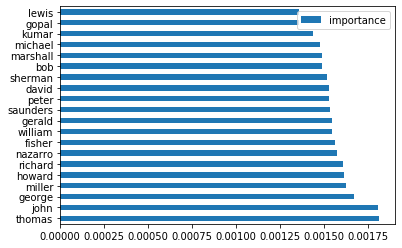

In [169]:
f.plot(kind="barh")

### Task #6: Build a pipeline to vectorize the date, then train and fit your models.
You should train multiple types of models and try different combinations of the tuning parameters for each model to obtain the best one. You can use the SKlearn functions of GridSearchCV and Pipeline to help automate this process.


### Task #7: Run predictions and analyze the results on the test set to identify the best model.  

In [ ]:
# Form a prediction set


In [ ]:
# Report the confusion matrix



In [ ]:
# Print a classification report


In [ ]:
# Print the overall accuracy and F1 score


### Task #8: Refit the model to all of your data and then use that model to predict the holdout set. 

### #9: Save your predictions as a csv file that you will send to the instructional staff for evaluation. 

## Great job!